week 8 - assignment - imputation

Assignment Content

Each XLS or XLSX file contains a dataframe. ​

Load each XLS or XLSX file in your Jupyter notebook. ​

For each dataframe, address missing values by taking the following steps:​

Count the number of missing values in the dataframe; count the number of missing values per column​
Plot the distribution of data points using a histogram​
Create a lag plot (a lag plot shows t versus t+1)​
Based on the lag plot, state in a markdown cell whether the order of this data matters. ​
Do one of the following (not both):​
If the order of the data matters, then interpolate the missing values​
If the order of the data does not matter, fill in the missing data by sampling from the distribution​
Create a scatter plot using the columns in dataframe; no Nan entries should be present​

In [58]:
# importing required packages
import pandas as p
import numpy as n
import matplotlib.pyplot as plot

DATAFRAME 1

In [59]:
df1=p.read_excel("C:/Users/pragathi/Downloads/imputation_homework_04.xls",index_col=0)
df1.shape

(500, 2)

In [60]:
df1.head()

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655


In [61]:
df1.isnull().sum()     #finding null values

time      0
value    50
dtype: int64

Text(0, 0.5, 'count')

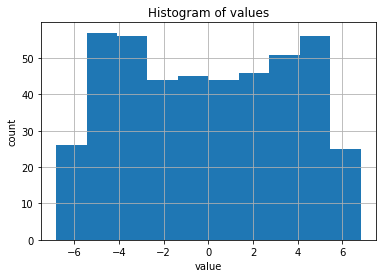

In [62]:
df1.value.hist()             # plotting histogram for values in df1
plot.title('Histogram of values')
plot.xlabel('value')
plot.ylabel('count')

Text(0.5, 1.0, 'lag plot')

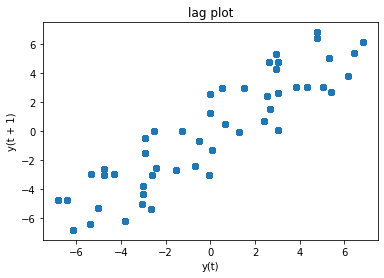

In [63]:
p.plotting.lag_plot(df1.value, lag=1)   #plotting lag plot for value in df1
plot.title('lag plot')

order of df1 matters

In [64]:
#interpolating the missing values
#above plot is like linear relationship.so i am using linear interpolation to fill the missing values
df1['value'].interpolate(method="linear",inplace=True)

In [65]:
df1.isnull().sum()     #finding null values after interpoltion

time     0
value    0
dtype: int64

Text(0.5, 1.0, ' interpolation lag plot')

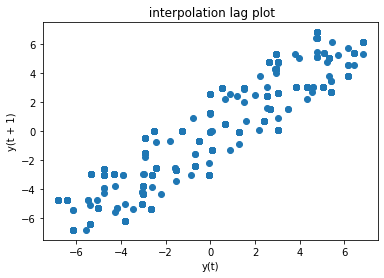

In [66]:
#plotting lag plot after linear interpolation
p.plotting.lag_plot(df1.value, lag=1)
plot.title(' interpolation lag plot')

Text(0, 0.5, 'value')

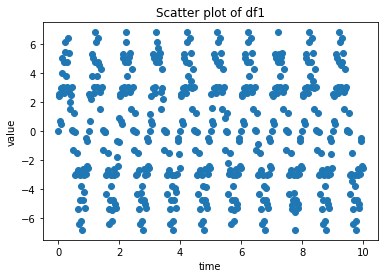

In [67]:
# creating scatter plot
plot.scatter(df1['time'], df1['value'])
plot.title('Scatter plot of df1')
plot.xlabel('time')
plot.ylabel('value')

DATAFRAME 2

In [68]:
df2=p.read_excel("C:/Users/pragathi/Downloads/imputation_homework_29.xlsx",index_col=0)
df2.shape

(108, 2)

In [69]:
df2.head()

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00


In [70]:
df2.isnull().sum()

x    9
y    0
dtype: int64

Text(0, 0.5, 'count')

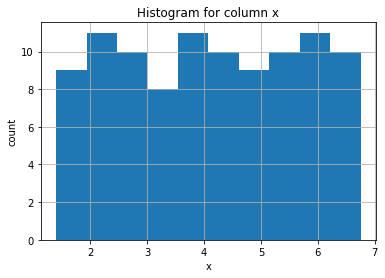

In [71]:
df2.x.hist()
plot.title('Histogram for column x')
plot.xlabel('x')
plot.ylabel('count')

Text(0.5, 1.0, 'lag plot for df2')

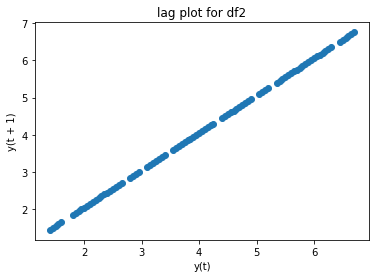

In [72]:
p.plotting.lag_plot(df2.x, lag=1)
plot.title('lag plot for df2')

order of df2 matters

In [73]:
#interpolating the missing values
#above plot has linear relationship.so i am using linear interpolation to fill the missing values
df2['x'].interpolate(method="linear",inplace=True)

In [74]:
df2.isnull().sum()

x    0
y    0
dtype: int64

Text(0.5, 1.0, ' interpolation lag plot for df2')

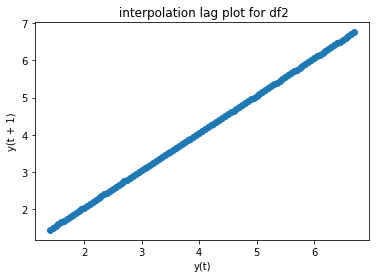

In [75]:
#plotting lag plot after linear interpolation
p.plotting.lag_plot(df2.x, lag=1)
plot.title(' interpolation lag plot for df2')

Text(0, 0.5, 'y')

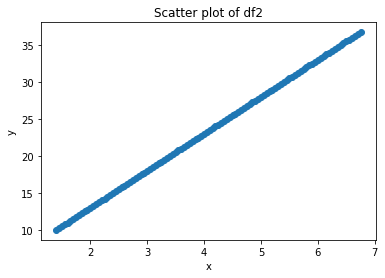

In [76]:
# creating scatter plot
plot.scatter(df2['x'], df2['y'])
plot.title('Scatter plot of df2')
plot.xlabel('x')
plot.ylabel('y')

DATAFRAME 3

In [77]:
df3=p.read_excel("C:/Users/pragathi/Downloads/imputation_homework_91.xlsx",index_col=0)

In [78]:
df3.shape

(852, 2)

In [79]:
df3.head()

,date,value
0,2015-11-03,30.001248
1,2015-11-04,4.655104
2,2015-11-05,15.621201
3,2015-11-06,22.982759
4,2015-11-07,39.994644


In [80]:
df3.isnull().sum()

date      0
value    84
dtype: int64

Text(0, 0.5, 'count')

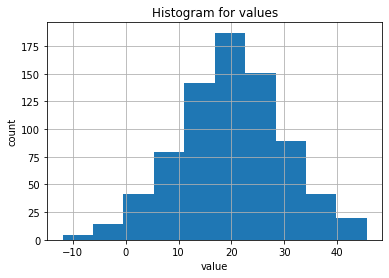

In [81]:
df3.value.hist()
plot.title('Histogram for values')
plot.xlabel('value')
plot.ylabel('count')

Text(0.5, 1.0, 'lag plot for df3')

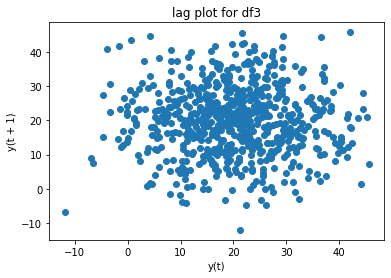

In [82]:
p.plotting.lag_plot(df3.value, lag=1)
plot.title('lag plot for df3')

order of df3 does not matter.data is spread randomly.

In [83]:
#filling missing values by sampling from the distribution
#first get the summary of the data
df3.describe()

,value
count,768.000000
mean,19.942003
std,9.913299
min,-11.958218
25%,13.867079
50%,20.035438
75%,26.305033
max,45.670946


In [84]:
# getting samples from distribution with mean = 19.942003 and standard deviation = 9.913299
sample = n.random.normal(19.942003, 9.913299, 84)

In [85]:
df3.loc[df3.value.isnull(),'value'] = sample

In [86]:
df3.isnull().sum()

date     0
value    0
dtype: int64

Text(0, 0.5, 'value')

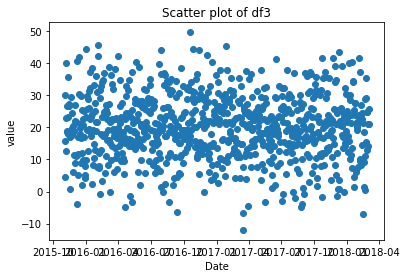

In [87]:
plot.scatter(df3['date'], df3['value'])
plot.title('Scatter plot of df3')
plot.xlabel('Date')
plot.ylabel('value')

#  references:
lagpolt:https://pandas.pydata.org/docs/reference/api/pandas.plotting.lag_plot.html

interpolation in time series:https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/